In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [54]:
rand_state = 1000

In [3]:
from pca import pca

In [4]:
usarrest = pd.read_csv("USArrest.csv")
usarrest.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
x = usarrest.drop("state", axis=1) # scaling features automatically done
states = usarrest.state

In [6]:
#normalise is scales are different
model = pca(n_components=4, normalize=True)

In [7]:
results = model.fit_transform(x)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [8]:
#results

In [9]:
loadings=results["loadings"]
#loadings = pca.components_T * np.sqrt(pca.explained_variance_)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [10]:
scores = results["PC"]
scores["labels"]=states
scores.head()

,PC1,PC2,PC3,PC4,labels
0,0.985566,1.133392,-0.444269,0.156267,Alabama
1,1.950138,1.073213,2.040003,-0.438583,Alaska
2,1.763164,-0.745957,0.054781,-0.834653,Arizona
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas
4,2.523980,-1.542934,0.598557,-0.341996,California


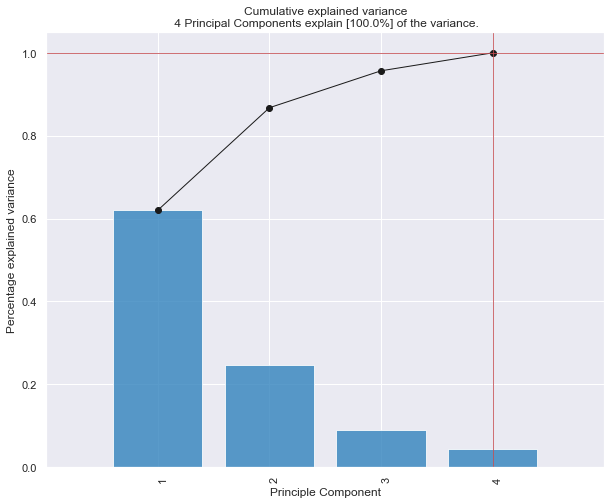

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 4 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [11]:
model.plot(figsize=(10,8))

[pca] >Plot PC1 vs PC2 with loadings.


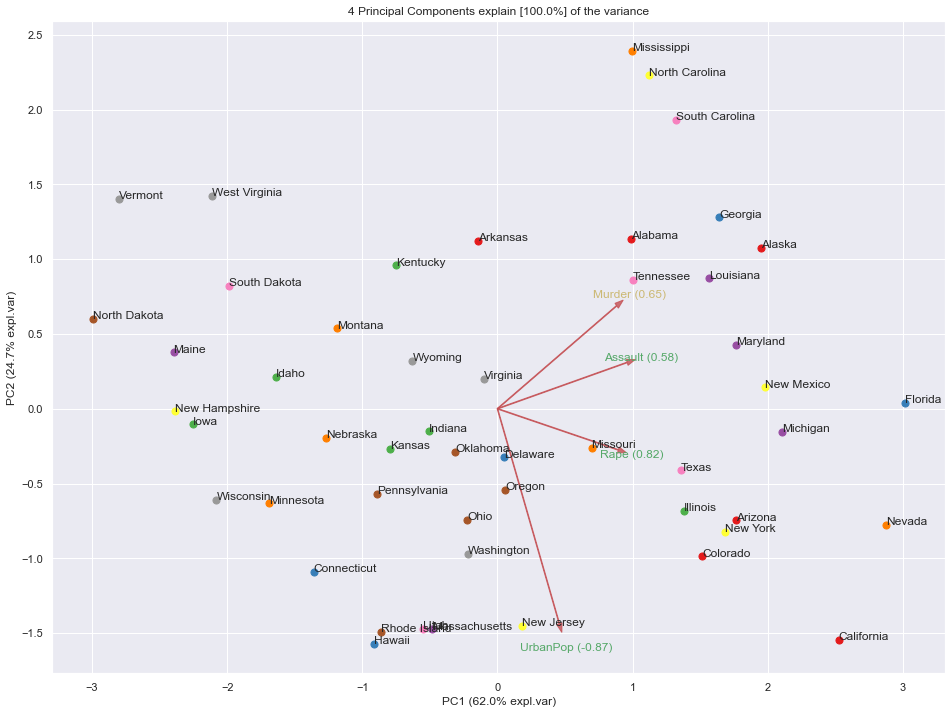

(<Figure size 1152x864 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (62.0% expl.var)', ylabel='PC2 (24.7% expl.var)'>)

In [12]:
model.biplot(n_feat=4, legend=False, figsize=(16,12), y=states, label=True)

# Wine Dataset

In [66]:
df = pd.read_csv("Wine.csv")

In [14]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [18]:
df["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [19]:
df.groupby(["Customer_Segment"]).mean().round(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Customer_Segment,,,,,,,,,,,,,
1,13.74,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,5.53,1.06,3.16,1115.71
2,12.28,1.93,2.24,20.24,94.55,2.26,2.08,0.36,1.63,3.09,1.06,2.79,519.51
3,13.15,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,7.40,0.68,1.68,629.90


In [21]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [67]:
X = df.drop("Customer_Segment", axis=1)
labels = df.Customer_Segment

In [73]:
model = pca(n_components=0.9, normalize=True)

In [74]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [75]:
loadings = results["loadings"]
loadings

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023


In [76]:
scores=results["PC"]
scores["labels"] = labels
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,labels
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,1


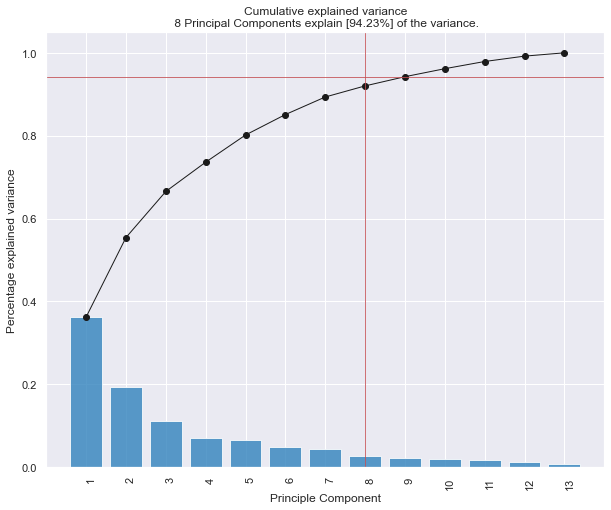

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 8 Principal Components explain [94.23%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [77]:
model.plot(figsize=(10,8))

In [42]:
results["explained_var"]

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

[pca] >Plot PC1 vs PC2 with loadings.


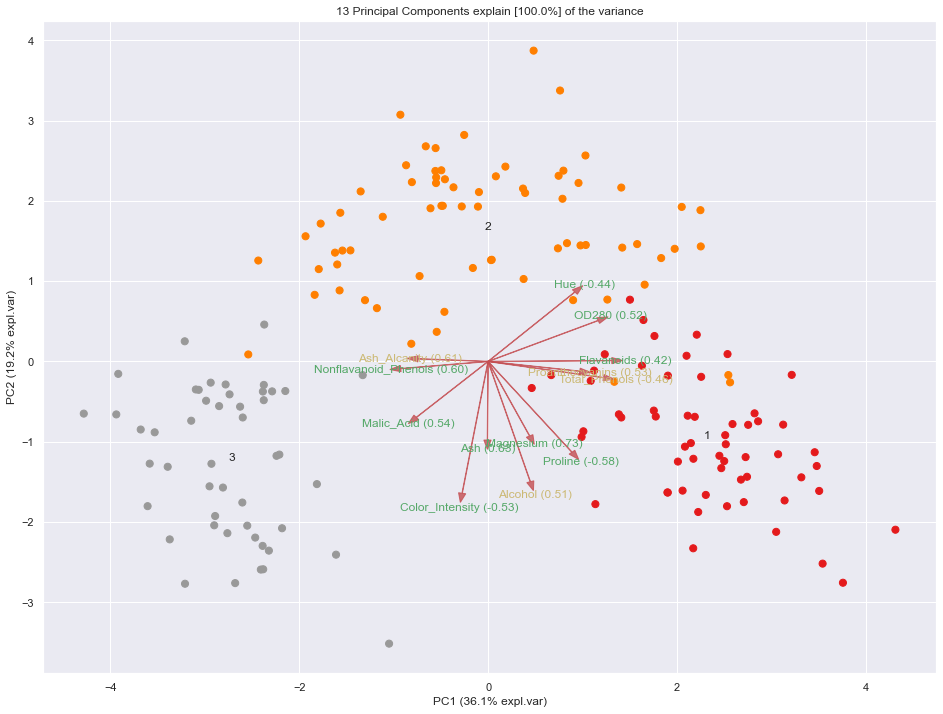

(<Figure size 1152x864 with 1 Axes>,
 <AxesSubplot:title={'center':'13 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

In [41]:
model.biplot(n_feat=13, legend=False, figsize=(16,12), y=labels, label=True)